## Import Necessery Packages

In [1]:
# General use packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For preprocess
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# For algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# For evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn import metrics

# Preprocess the Data

In [2]:
dataset = pd.read_csv('Dataset_Firewall.csv')

## Visualize the Data

In [3]:
dataset.shape

(65532, 12)

In [4]:
dataset.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [5]:
dataset.tail()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0
65531,54867,445,0,0,drop,70,70,0,1,0,1,0


##### Column Names

In [6]:
dataset.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

##### Number of Columns

In [7]:
len(dataset.columns)

12

#### Actions Taken

In [8]:
pd.unique(dataset['Action'])

array(['allow', 'drop', 'deny', 'reset-both'], dtype=object)

##### Dataset Type

In [9]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


## Label Encoding

In [10]:
le = LabelEncoder()
dataset['Action'] = le.fit_transform(dataset['Action'])

In [11]:
dataset.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,0,177,94,83,2,30,1,1
1,56258,3389,56258,3389,0,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,0,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,0,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,0,25358,6778,18580,31,16,13,18


In [12]:
dataset.tail()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
65527,63691,80,13237,80,0,314,192,122,6,15,4,2
65528,50964,80,13485,80,0,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,2,70,70,0,1,0,1,0
65530,54870,445,0,0,2,70,70,0,1,0,1,0
65531,54867,445,0,0,2,70,70,0,1,0,1,0


## Train Test Split

In [13]:
random_seed = 86

train, test = train_test_split(dataset, test_size=0.1, shuffle=True, random_state=random_seed)

In [14]:
x_train = train.drop('Action',axis=1)
y_train = train.loc[:,'Action']

x_test = test.drop('Action',axis=1)
y_test = test.loc[:,'Action']

# First Model

## K-NN Model Create

In [15]:
model_knn = KNeighborsClassifier(n_neighbors=1)

## K-NN Model Train

In [16]:
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## K-NN Model Test

In [17]:
predictions_knn = model_knn.predict(x_test)

predictions_knn

array([0, 1, 0, ..., 0, 0, 0])

##### Display Confusion Matrix

In [18]:
print(confusion_matrix(y_test, predictions_knn))

[[3762   15    0    1]
 [   6 1504    2    2]
 [   0    3 1253    0]
 [   2    3    0    1]]


##### Accuracy & Metrics

In [19]:
print(metrics.accuracy_score(y_test, predictions_knn))

print("- - - - - - - - - - - - - - - - - - - - - - - - - - - ")

print(classification_report(y_test, predictions_knn))

0.9948123283490998
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3778
           1       0.99      0.99      0.99      1514
           2       1.00      1.00      1.00      1256
           3       0.25      0.17      0.20         6

    accuracy                           0.99      6554
   macro avg       0.81      0.79      0.80      6554
weighted avg       0.99      0.99      0.99      6554



##### Detailed Metrics

In [20]:
precision_knn = precision_score(y_test, predictions_knn, average='weighted')
recall_knn = recall_score(y_test, predictions_knn, average='weighted')
f1score_knn = f1_score(y_test, predictions_knn, average='weighted')

print(precision_knn)
print(recall_knn)
print(f1score_knn)

0.9946037390382999
0.9948123283490998
0.9946967332562319


# Second Model

## Decision Tree Model Create

In [21]:
model_dtree = tree.DecisionTreeClassifier(random_state=random_seed)

## Decision Model Train

In [22]:
model_dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=86)

## Decision Model Test

In [23]:
predictions_dtree = model_dtree.predict(x_test)

predictions_dtree

array([0, 1, 0, ..., 0, 0, 0])

##### Display Confusion Matrix

In [24]:
print(confusion_matrix(y_test, predictions_dtree))

[[3775    3    0    0]
 [   0 1512    2    0]
 [   0    4 1252    0]
 [   0    1    0    5]]


##### Accuracy & Metrics

In [25]:
print(metrics.accuracy_score(y_test, predictions_dtree))

print("- - - - - - - - - - - - - - - - - - - - - - - - - - - ")

print(classification_report(y_test, predictions_dtree))

0.9984742142203235
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3778
           1       0.99      1.00      1.00      1514
           2       1.00      1.00      1.00      1256
           3       1.00      0.83      0.91         6

    accuracy                           1.00      6554
   macro avg       1.00      0.96      0.98      6554
weighted avg       1.00      1.00      1.00      6554



##### Detailed Metrics

In [26]:
precision_dtree = precision_score(y_test, predictions_dtree, average='weighted')
recall_dtree = recall_score(y_test, predictions_dtree, average='weighted')
f1score_dtree = f1_score(y_test, predictions_dtree, average='weighted')

print(precision_dtree)
print(recall_dtree)
print(f1score_dtree)

0.998478545797178
0.9984742142203235
0.9984683318833175


# Third Model

## Random Forest Model Create

In [27]:
model_rf = RandomForestClassifier(n_estimators = 10000, random_state = random_seed)

## Random Forest Model Train

In [28]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10000, random_state=86)

## Random Forest Model Test

In [29]:
predictions_rf = model_rf.predict(x_test)

predictions_rf

array([0, 1, 0, ..., 0, 0, 0])

##### Display Confusion Matrix

In [30]:
print(confusion_matrix(y_test, predictions_rf))

[[3776    2    0    0]
 [   0 1512    2    0]
 [   0    3 1253    0]
 [   0    4    0    2]]


##### Accuracy & Metrics

In [31]:
print(metrics.accuracy_score(y_test, predictions_rf))

print("- - - - - - - - - - - - - - - - - - - - - - - - - - - ")

print(classification_report(y_test, predictions_rf))

0.9983216356423558
- - - - - - - - - - - - - - - - - - - - - - - - - - - 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3778
           1       0.99      1.00      1.00      1514
           2       1.00      1.00      1.00      1256
           3       1.00      0.33      0.50         6

    accuracy                           1.00      6554
   macro avg       1.00      0.83      0.87      6554
weighted avg       1.00      1.00      1.00      6554



##### Detailed Metrics

In [32]:
precision_rf = precision_score(y_test, predictions_rf, average='weighted')
recall_rf = recall_score(y_test, predictions_rf, average='weighted')
f1score_rf = f1_score(y_test, predictions_rf, average='weighted')

print(precision_rf)
print(recall_rf)
print(f1score_rf)

0.9983277123119995
0.9983216356423558
0.9981708002682422


# Conclusion

## Visualize the Metrics

### Make Array From Accuracies

In [33]:
algorithm_names =['K-NN', 'Decision Tree', 'Random Forest']

acc_array = np.array([metrics.accuracy_score(y_test, predictions_knn),
                      metrics.accuracy_score(y_test, predictions_dtree),
                      metrics.accuracy_score(y_test, predictions_rf)])
acc_array = acc_array * 100

acc_array

array([99.48123283, 99.84742142, 99.83216356])

### Accuracy Graph

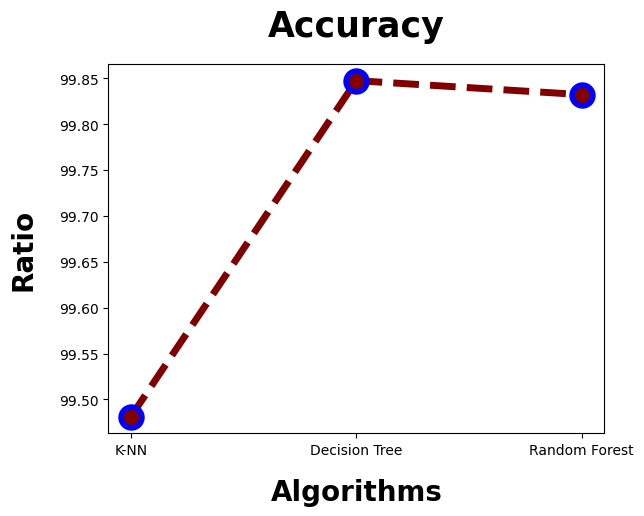

In [34]:
plt.plot(algorithm_names,
         acc_array,
         color='maroon',
         linewidth=5,
         marker='o',
         markersize=15,
         markeredgecolor='blue',
         markeredgewidth=4,
         linestyle='--')

plt.xlabel('Algorithms', fontdict={'fontsize': 20, 'fontweight': 'bold'}, labelpad=15)
plt.ylabel('Ratio', fontdict={'fontsize': 20, 'fontweight': 'bold'}, labelpad=15)

plt.title('Accuracy', fontdict={'fontsize': 25, 'fontweight': 'bold'}, pad=20)

plt.show()

### Make Array From Precisions

In [35]:
precision_array = np.array([precision_score(y_test, predictions_knn, average='weighted'),
                            precision_score(y_test, predictions_dtree, average='weighted'),
                            precision_score(y_test, predictions_rf, average='weighted')])
precision_array = precision_array * 100

### Precision Graph

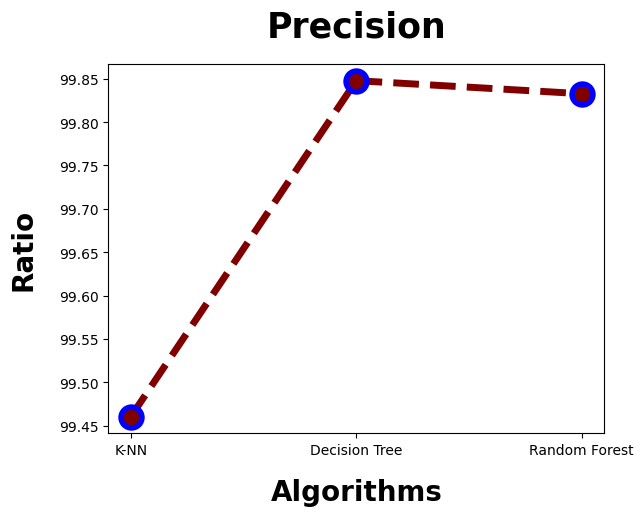

In [36]:
plt.plot(algorithm_names,
         precision_array,
         color='maroon',
         linewidth=5,
         marker='o',
         markersize=15,
         markeredgecolor='blue',
         markeredgewidth=4,
         linestyle='--')

plt.xlabel('Algorithms', fontdict={'fontsize': 20, 'fontweight': 'bold'}, labelpad=15)
plt.ylabel('Ratio', fontdict={'fontsize': 20, 'fontweight': 'bold'}, labelpad=15)

plt.title('Precision', fontdict={'fontsize': 25, 'fontweight': 'bold'}, pad=20)

plt.show()

### Make Array From Recall

In [37]:
recall_array = np.array([recall_score(y_test, predictions_knn, average='weighted'),
                        recall_score(y_test, predictions_dtree, average='weighted'),
                        recall_score(y_test, predictions_rf, average='weighted')])
recall_array = recall_array * 100

### Precision Graph

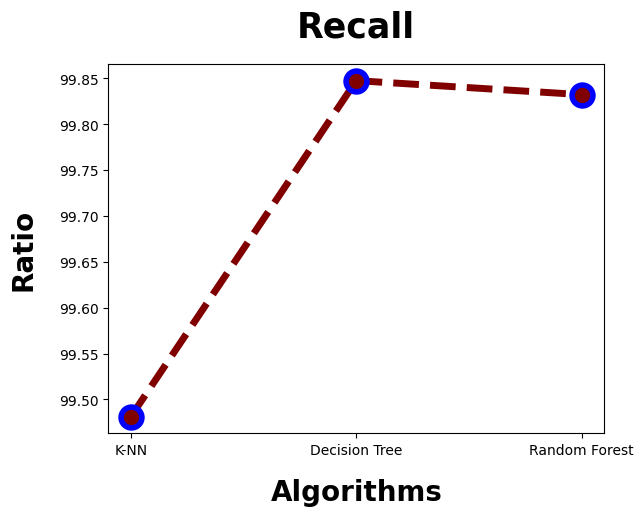

In [38]:
plt.plot(algorithm_names,
         recall_array,
         color='maroon',
         linewidth=5,
         marker='o',
         markersize=15,
         markeredgecolor='blue',
         markeredgewidth=4,
         linestyle='--')

plt.xlabel('Algorithms', fontdict={'fontsize': 20, 'fontweight': 'bold'}, labelpad=15)
plt.ylabel('Ratio', fontdict={'fontsize': 20, 'fontweight': 'bold'}, labelpad=15)

plt.title('Recall', fontdict={'fontsize': 25, 'fontweight': 'bold'}, pad=20)

plt.show()

### Make Array From F1 Score

In [39]:
f1score_array = np.array([f1_score(y_test, predictions_knn, average='weighted'),
                          f1_score(y_test, predictions_dtree, average='weighted'),
                          f1_score(y_test, predictions_rf, average='weighted')])
f1score_array = f1score_array * 100

### Precision Graph

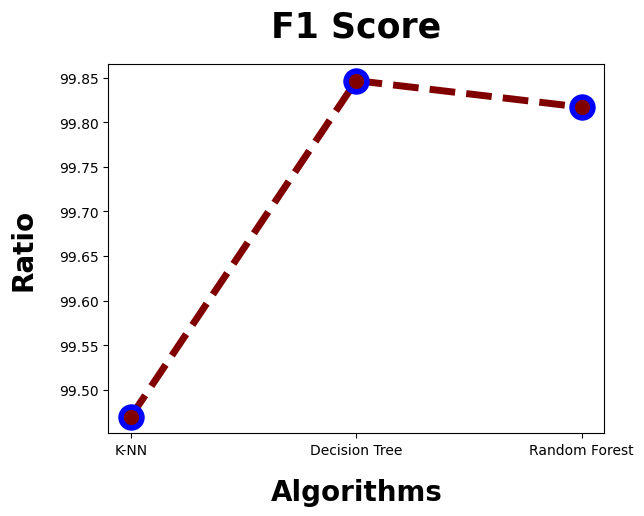

In [40]:
plt.plot(algorithm_names,
         f1score_array,
         color='maroon',
         linewidth=5,
         marker='o',
         markersize=15,
         markeredgecolor='blue',
         markeredgewidth=4,
         linestyle='--')

plt.xlabel('Algorithms', fontdict={'fontsize': 20, 'fontweight': 'bold'}, labelpad=15)
plt.ylabel('Ratio', fontdict={'fontsize': 20, 'fontweight': 'bold'}, labelpad=15)

plt.title('F1 Score', fontdict={'fontsize': 25, 'fontweight': 'bold'}, pad=20)

plt.show()